In [20]:
import pandas as pd
import math
import time
import seaborn as sns

In [21]:
df = pd.read_csv("CleanedTitanic.csv")
#df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [22]:
# Test/Train Split
length = len(df.index)
splitPoint = int(length * 0.7)
train = df[0:splitPoint]
test = df[splitPoint:length]

# K-NN Algorithm

In [39]:
# K-NN Training Algorithm
def trainKNN(df, iterations):
  '''
  Pseudocode Algorithm
  1. Set K to 3 because this is the first odd value greater than the number of categories in the Titanic dataset.
  2. Create an empty list to collect accuracy values during training.
  2. Segment the training dataset into three equal parts: 
    - Segment 1: Class 1 labels
    - Segment 2: Class 2 labels
    - Segment 3: Remaining data of "unknown" labels 
  3. Calculate the euclidean distance between each data point in segment 3 with all data in segment 1 and segment 2. 
  4. Take the top K smallest distances to determine the label of the "unknown" data point.
  5. Append 0 to accuracy list if the label does not match the actual label. Append 1 to accuracy list if the label does match the actual label.
  6. Calculate the overall accuracy percent of the K value and append it to a dictionary of k, accuracy values.
  7. Add 2 to K and repeat steps 3 - 6 for a desired number of iterations.
  '''
  # Set initial value of k
  k = 3

  # Segment training data into 3 segments.
  class1, class2, unknowns = getSegments(df)
  
  # Calculate accuracy of K values for desired iterations
  count = 0
  accuracies = {}
  t0 = time.time() # for measuring how long it takes to compute
  t0_k = k
  while count < iterations:
    if count % 10 == 0:
      elapsed = time.time() - t0
      t0 = time.time()
      print(f"Took {elapsed:.2f} seconds to compute {t0_k}<=k<{k}")
      t0_k = k
    # Calculate percent accuracy for current k
    accuracy_at_k = calculateAccuracy(class1, class2, unknowns, k)
    accuracies[k] = accuracy_at_k
    k = k + 2
    count = count + 1
  
  return accuracies

def getSegments(df):
  # Segment training data into 3 segments. If not divisible by 3, add extra data to unknown segment.
  length = len(df.index)
  splitPoint = int(length/3)
  survived = df[df.Survived == 1]
  died = df[df.Survived == 0]
  survived_df = survived.iloc[:splitPoint]
  died_df = died.iloc[:splitPoint]
  leftover = pd.concat([survived.iloc[splitPoint:], died.iloc[splitPoint:]])
  survived.reset_index(inplace=True, drop=True)
  died.reset_index(inplace=True, drop=True)
  leftover.reset_index(inplace=True, drop=True)
  return survived_df, died_df, leftover


def euclidianDistance(row1, row2):
  sum = 0
  for (i, j) in zip(row1[1:10], row2[1:10]):
    diffSQ = (i - j) **2
    sum = sum + diffSQ
  return math.sqrt(sum)

cache = {}
def calculateAccuracy(class1, class2, unknowns, k):
  known = pd.concat([class1, class2], axis=0)
  unknown_prediction_correct = []
  for idx in unknowns.index:
    if not idx in cache:
      cache[idx] = known.apply(lambda x: euclidianDistance(x, unknowns.iloc[idx]), axis=1)
    known['distance_to_unknown'] = cache[idx]
    top_k = known.sort_values('distance_to_unknown',ascending=True).head(k)
    predicted_class = top_k.value_counts(ascending=False, subset='Survived').index[0] # TODO: double check this line
    if predicted_class == unknowns.iloc[idx].Survived:
      unknown_prediction_correct.append(1)
    else:
      unknown_prediction_correct.append(0)
    known.pop('distance_to_unknown') # remove this so we don't use it in future distance calculations
  return sum(unknown_prediction_correct) / len(unknown_prediction_correct)

In [40]:
performance = trainKNN(train, 100)

Took 0.00 seconds to compute 3<=k<3


ZeroDivisionError: division by zero

In [25]:
print(performance)

{3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 15: 1.0, 17: 1.0, 19: 1.0, 21: 1.0, 23: 1.0, 25: 1.0, 27: 1.0, 29: 1.0, 31: 1.0, 33: 1.0, 35: 1.0, 37: 1.0, 39: 1.0, 41: 1.0, 43: 1.0, 45: 1.0, 47: 1.0, 49: 1.0, 51: 1.0, 53: 1.0, 55: 1.0, 57: 1.0, 59: 1.0, 61: 1.0, 63: 1.0, 65: 1.0, 67: 1.0, 69: 1.0, 71: 1.0, 73: 1.0, 75: 1.0, 77: 1.0, 79: 1.0, 81: 1.0, 83: 1.0, 85: 1.0, 87: 1.0, 89: 1.0, 91: 1.0, 93: 1.0, 95: 1.0, 97: 1.0, 99: 1.0, 101: 1.0, 103: 1.0, 105: 1.0, 107: 1.0, 109: 1.0, 111: 1.0, 113: 1.0, 115: 1.0, 117: 1.0, 119: 1.0, 121: 1.0, 123: 1.0, 125: 1.0, 127: 1.0, 129: 1.0, 131: 1.0, 133: 1.0, 135: 1.0, 137: 1.0, 139: 1.0, 141: 1.0, 143: 1.0, 145: 1.0, 147: 1.0, 149: 1.0, 151: 1.0, 153: 1.0, 155: 1.0, 157: 1.0, 159: 1.0, 161: 1.0, 163: 1.0, 165: 1.0, 167: 1.0, 169: 1.0, 171: 1.0, 173: 1.0, 175: 1.0, 177: 1.0, 179: 1.0, 181: 1.0, 183: 1.0, 185: 1.0, 187: 1.0, 189: 1.0, 191: 1.0, 193: 1.0, 195: 1.0, 197: 1.0, 199: 1.0, 201: 1.0}


# Visualizing K Accuracy

In [26]:
kacc = pd.DataFrame({
    "k": list(sorted(performance.keys())),
    "accuracy": [performance[k] for k in sorted(performance.keys())]
})
kacc.head()

,k,accuracy
0,3,1.0
1,5,1.0
2,7,1.0
3,9,1.0
4,11,1.0


<AxesSubplot:xlabel='k', ylabel='accuracy'>

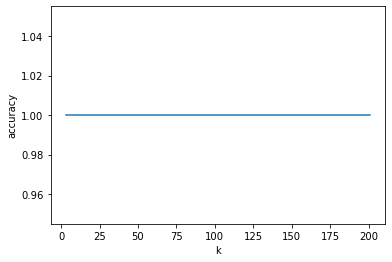

In [27]:
sns.lineplot(x=kacc.k, y=kacc.accuracy)

In [41]:
k = 109
unknown = test.iloc[:,1:10]
knonw = test.iloc[:,0:1]
votes =[] 

def vote(known, topPoint,points,i):
    survived = 0
    died=0
    for j in range (len(topPoint)):
        index = points.index(topPoint[i])
        guess = known['Survived'][index]
        if guess ==0:
            died+=1
        else:
            survived+=1
    if survived>died:
        votes.append(0)
    else:
        votes.append(1)
